In [1]:
import numpy as np
import random
from CompilerQC import Graph
from CompilerQC import core
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPoint
from CompilerQC import Polygons
from CompilerQC import Energy
from CompilerQC import MC
from scipy.special import binom
import networkx as nx

In [25]:
np.load("1success_rates_for_7.npy")

array([[10,  9, 10, ...,  9, 12, 10],
       [10, 10,  8, ..., 10, 10, 11],
       [ 3,  3,  2, ...,  3,  3,  4],
       ...,
       [14, 13, 14, ..., 15, 12, 13],
       [ 4,  2,  3, ...,  2,  4,  4],
       [ 3,  4,  3, ...,  4,  3,  5]])

In [2]:
N = 5
graph = Graph.complete(N)

In [3]:
nn = core.largest_complete_bipartite_graph(graph)
K_nn = core.complete_bipartite_graph(*nn)
U, V = core.parts_of_complete_bipartite_graph(graph.to_nx_graph(), K_nn)
core_qbits, core_coords = core.qbits_and_coords_of_core(U, V)

In [4]:
from networkx.algorithms import bipartite


def complete_bipartite_from_sets(U, V):
    complete_bipartite = nx.complete_bipartite_graph(len(U), len(V))
    u, v = bipartite.sets(complete_bipartite)
    mapping = {**(dict(zip(u, U))), **(dict(zip(v, V)))}
    return nx.relabel_nodes(complete_bipartite, mapping)


def sort_s2_as_s1(s1, s2):
    order = {v: i for i, v in enumerate(s1)}
    return sorted(s2, key=lambda v: len(s1) if v not in order.keys() else order[v])


def order_as_former_bipartite(UV1, UV2):
    U = sort_s2_as_s1(UV1[0], UV2[0])
    V = sort_s2_as_s1(UV1[1], UV2[1])
    return U, V

In [5]:
list_of_UV = []
for i in range(N - 3):
    S = core.complete_bipartite_graph((N - 2) - i, 2 + i)
    print(((N - 2) - i, 2 + i))
    if core.subgraph_is_monomorphic(graph.to_nx_graph(), S):
        UV = core.parts_of_complete_bipartite_graph(graph.to_nx_graph(), S)
        list_of_UV.append(UV)
for i in range(1, len(list_of_UV)):
    list_of_UV[i] = order_as_former_bipartite(list_of_UV[i - 1], list_of_UV[i])

large_core = dict()
for uv in list_of_UV:
    qbit_coord_dict = dict(zip(*(core.qbits_and_coords_of_core(*uv))))
    large_core.update(qbit_coord_dict)

core_qbits, core_coords = large_core.keys(), large_core.values()

(3, 2)
(2, 3)


In [33]:
polygon_object = Polygons(graph, core_bipartite_sets=[U, V])
mc = MC(polygon_object, temperature=1)

In [40]:
# mc = MC(polygon_object, temperature=1, UV = [U, V])
# mc.terms = [1,0,1]
mc.update_temperature()
for i in range(100):
    # mc.update_temperature(10)
    mc.apply("contract", 10)
    # mc.apply('swap_lines_in_core', 0)
    # mc.apply('grow_core', 1)

# success = mc.energy.distance_to_plaquette() - polygon_object.C

In [41]:
# probabilities = np.exp(- delta_energy / temperatures)
# probabilities[probabilities >=1] = 1
# plt.plot(energy, label='energy')
# plt.plot(delta, label='delta_energy')
# plt.plot(temperatures, label='temp')
# plt.legend()
# plt.show()
# plt.plot(probabilities, label='acceptance probability')
# plt.legend()

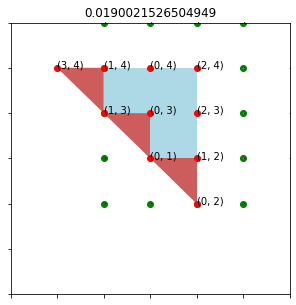

6


In [42]:
# mc.polygon.move_center_to_middle()
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))
# mc.apply('grow_core', 100)
for coord in mc.free_neighbour_coords(mc.polygon.core_coords):
    ax.annotate(".", coord)
    ax.scatter(*coord, color="green")
mc.polygon.visualize(ax, mc.polygon.get_all_polygon_coords(), zoom=1)
fit = Energy(mc.polygon)

ax.set_title(str(fit(mc.polygon)))
plt.show()
print(graph.num_constrains())

In [10]:
for N in range(4, 10):
    graph = Graph.fully(N)

    polygon_object = Polygons(graph)
    fig, ax = plt.subplots(ncols=1, figsize=(11, 11))
    lhz_coords = qbits = polygon_object.qbits
    polygon_object.update_qbits_coords(qbits, lhz_coords)
    polygon_object.visualize(ax, polygon_object.get_all_polygon_coords())

    plt.title(str(Energy(polygon_object)(polygon_object, terms=[0, 1, 0])))

AttributeError: type object 'Graph' has no attribute 'fully'

In [ ]:
import argparse

parser = argparse.ArgumentParser()  # description='Process some integers.')
# parser.add_argument('integers', metavar='N', type=int, nargs='+',
#                     help='an integer for the accumulator')
# parser.add_argument('--sum', dest='accumulate', action='store_const',
#                     const=sum, default=max,
#                     help='sum the integers (default: find the max)')
# args = parser.parse_args(['--sum', '7', '-1', '42'])

# args = parser.parse_args()
# print(args.accumulate(args.integers))

In [ ]:
parser.add_argument("--kerem-e")
parser.add_argument("-f")

In [ ]:
opts = parser.parse_args()

In [ ]:
opts.kerem_e